I0000 00:00:1717538371.104845 3529235 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1717538371.123887 3530408 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717538371.136534 3530408 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/bernardozamin/miniconda3/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


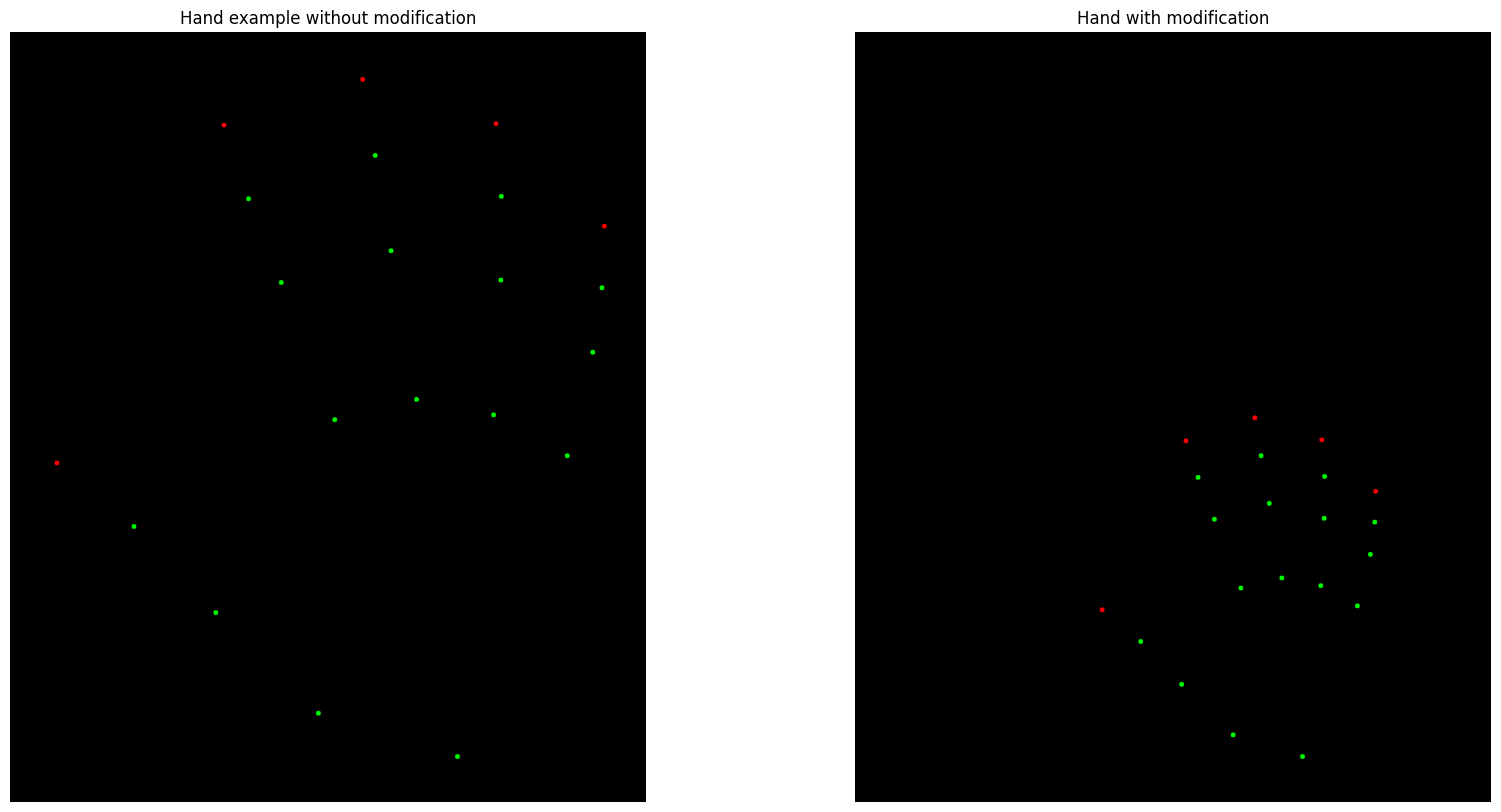

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt


mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)


image_path = '/Users/bernardozamin/Downloads/Malta/codes/mao.jpeg'  
image = cv2.imread(image_path)


results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


hands.close()


height, width, _ = image.shape
e_black_background = np.zeros((height, width, 3), dtype=np.uint8)
black_background = np.zeros((height, width, 3), dtype=np.uint8)


keypoints = []
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        for lm in hand_landmarks.landmark:
            keypoints.append((lm.x * width, lm.y * height))


def adjust_keypoint_length(keypoints, base_indices, first_middle_indices, sec_middle_indices, tip_indices, factor=1.0):
    adjusted_keypoints = keypoints.copy()
    
    palm_center = np.array(keypoints[0])
    for i in range(1, len(keypoints)):
        if i in base_indices or i in first_middle_indices or i in sec_middle_indices or i in tip_indices:
            point = np.array(keypoints[i])
            direction = point - palm_center
            adjusted_point = palm_center + direction * factor
            adjusted_keypoints[i] = tuple(map(int, adjusted_point.tolist()))
    return adjusted_keypoints


base_indices = [0, 5, 9, 13, 17]
first_middle_indices = [1, 2, 6, 10, 14, 18]
sec_middle_indices = [3, 7, 11, 15, 19]
tip_indices = [4, 8, 12, 16, 20]  


modified_keypoints = adjust_keypoint_length(
    keypoints, base_indices, first_middle_indices, sec_middle_indices, tip_indices, factor=0.5)


green_color = (0, 255, 0)
red_color = (0, 0, 255)  


for i, (x, y) in enumerate(keypoints):
    color = red_color if i in tip_indices else green_color
    cv2.circle(e_black_background, (int(x), int(y)), 5, color, cv2.FILLED)


for i, (x, y) in enumerate(modified_keypoints):
    color = red_color if i in tip_indices else green_color
    cv2.circle(black_background, (int(x), int(y)), 5, color, cv2.FILLED)


example_plot = cv2.cvtColor(e_black_background, cv2.COLOR_BGR2RGB)
modify_keypoints = cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(example_plot)
plt.title('Hand example without modification')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modify_keypoints)
plt.title('Hand with modification')
plt.axis('off')

plt.show()
